In [ ]:
#Connect google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Data Loading and Handling Missing Values

In [ ]:
# Load Data
df = pd.read_csv("/content/drive/My Drive/FYP/Colab Files/df_with_weather_traffic_data.csv")
df.head()

,Unnamed: 0,start_date,station_name,charging_time_hh_mm_ss,energy_kwh,address_1,address_2,city,state_province,zip_postal_code,...,geopoint,tmin,tmax,tavg,coco,user_latitude,user_longitude,length_m,duration_s,base_duration_s
0,0,2021-04-06T18:48:40+00:00,TOWN OF CARY / BOND PARK,01:30:22,10.587,801 High House Road,Bond Park Boathouse,Cary,North Carolina,27513,...,"{'lon': -78.825554, 'lat': 35.781303}",10.6,28.0,19.144,2.0,35.773009,-78.818306,4645,457,448
1,1,2021-04-06T16:44:39+00:00,TOWN OF CARY / BOND PARK,01:17:09,8.349,801 High House Road,Bond Park Boathouse,Cary,North Carolina,27513,...,"{'lon': -78.825554, 'lat': 35.781303}",10.6,28.0,19.144,2.0,35.773009,-78.818306,4645,457,448
2,2,2021-04-06T12:45:28+00:00,TOWN OF CARY / P2_DTCARYDEKCE2,00:28:15,1.548,113 Walnut St,NaN,Cary,North Carolina,27511,...,"{'lon': -78.779701, 'lat': 35.785385}",10.6,28.0,19.144,2.0,35.794295,-78.776003,1616,299,248
3,3,2021-04-05T21:58:48+00:00,TOWN OF CARY / P2_DTCARYDEKCE2,01:08:22,6.558,113 Walnut St,NaN,Cary,North Carolina,27511,...,"{'lon': -78.779701, 'lat': 35.785385}",5.6,23.9,15.752,2.0,35.794295,-78.776003,1616,299,248
4,4,2021-04-04T22:55:23+00:00,TOWN OF CARY / TOWNHALLEAST,07:08:24,44.355,228 Ambassador Loop,NaN,Cary,North Carolina,27513,...,"{'lon': -78.778816, 'lat': 35.789215}",3.3,23.3,12.404,2.0,35.801584,-78.766641,2528,295,277


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0                   0
start_date                   0
station_name                 0
charging_time_hh_mm_ss       0
energy_kwh                   0
address_1                    0
address_2                 9946
city                         0
state_province               0
zip_postal_code              0
fee                          0
model_number               731
latitude                     0
longitude                    0
geopoint                     0
tmin                         0
tmax                         0
tavg                         0
coco                      1623
user_latitude                0
user_longitude               0
length_m                     0
duration_s                   0
base_duration_s              0
dtype: int64


In [ ]:
# Drop columns
df = df.drop(['Unnamed: 0', 'address_2', 'model_number', 'address_1', 'city', 'state_province', 'zip_postal_code', 'geopoint', 'fee'], axis=1)

# Fill missing values in 'coco' with 0
df['coco'] = df['coco'].fillna(0)

# Verify the changes
missing_values_after = df.isnull().sum()
print(missing_values_after)

start_date                0
station_name              0
charging_time_hh_mm_ss    0
energy_kwh                0
latitude                  0
longitude                 0
tmin                      0
tmax                      0
tavg                      0
coco                      0
user_latitude             0
user_longitude            0
length_m                  0
duration_s                0
base_duration_s           0
dtype: int64


In [ ]:
print(df)

                      start_date                    station_name  \
0      2021-04-06T18:48:40+00:00        TOWN OF CARY / BOND PARK   
1      2021-04-06T16:44:39+00:00        TOWN OF CARY / BOND PARK   
2      2021-04-06T12:45:28+00:00  TOWN OF CARY / P2_DTCARYDEKCE2   
3      2021-04-05T21:58:48+00:00  TOWN OF CARY / P2_DTCARYDEKCE2   
4      2021-04-04T22:55:23+00:00     TOWN OF CARY / TOWNHALLEAST   
...                          ...                             ...   
20137  2022-07-08T15:22:00+00:00     TOWN OF CARY / BOND PARK BH   
20138  2022-07-07T22:36:42+00:00    TOWN OF CARY / TOWN HALL-PWH   
20139  2022-07-07T16:54:26+00:00  TOWN OF CARY / DT DECK P3 WEST   
20140  2022-07-06T23:58:46+00:00   TOWN OF CARY / DT DECK P2 (1)   
20141  2022-07-06T20:14:36+00:00   TOWN OF CARY / DT DECK P2 (2)   

      charging_time_hh_mm_ss  energy_kwh   latitude  longitude  tmin  tmax  \
0                   01:30:22      10.587  35.781303 -78.825554  10.6  28.0   
1                   01:17:0

In [ ]:
df['start_date'] = pd.to_datetime(df['start_date'])
df = df.sort_values(by=['start_date'])

In [ ]:
print(df)

                     start_date                   station_name  \
4421  2012-04-11 17:51:19+00:00      TOWN OF CARY / CHARGER #1   
14034 2012-04-11 18:02:16+00:00      TOWN OF CARY / CHARGER #1   
12096 2012-04-11 18:17:22+00:00      TOWN OF CARY / CHARGER #1   
14033 2012-05-02 19:38:09+00:00      TOWN OF CARY / CHARGER #1   
18110 2012-05-11 00:29:48+00:00      TOWN OF CARY / CHARGER #1   
...                         ...                            ...   
9777  2023-01-03 15:43:03+00:00  TOWN OF CARY / DT DECK P2 (2)   
18120 2023-01-03 15:53:37+00:00   TOWN OF CARY / TOWN HALL-PWH   
4430  2023-01-03 16:33:19+00:00  TOWN OF CARY / DT DECK P2 (2)   
15325 2023-01-03 17:29:44+00:00  TOWN OF CARY / DT DECK P2 (2)   
5940  2023-01-03 17:58:04+00:00   TOWN OF CARY / TOWN HALL-PWH   

      charging_time_hh_mm_ss  energy_kwh   latitude  longitude  tmin  tmax  \
4421                00:01:49       0.091  35.796886 -78.808044   7.8  19.4   
14034               00:00:00       0.000  35.796886

Data Visualization, Outlier Detection and Scaling





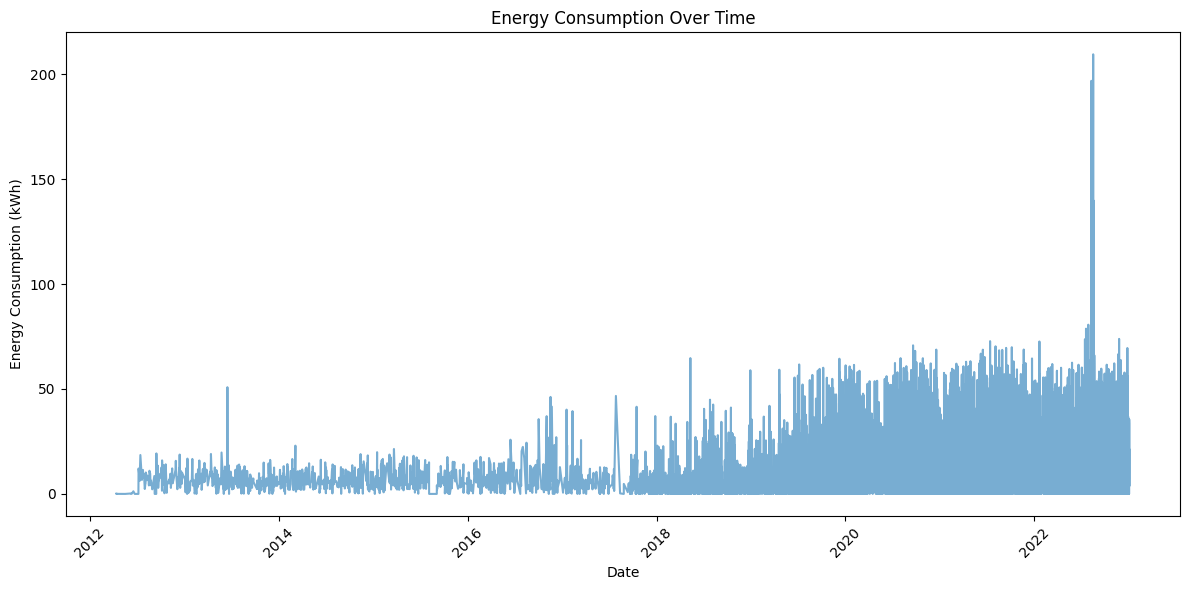

In [ ]:
#Chacking energy consumption distribution over time considerign all charging stations

plt.figure(figsize=(12, 6))
plt.plot(df['start_date'], df['energy_kwh'], label='Energy Consumption (kWh)', alpha=0.6)
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


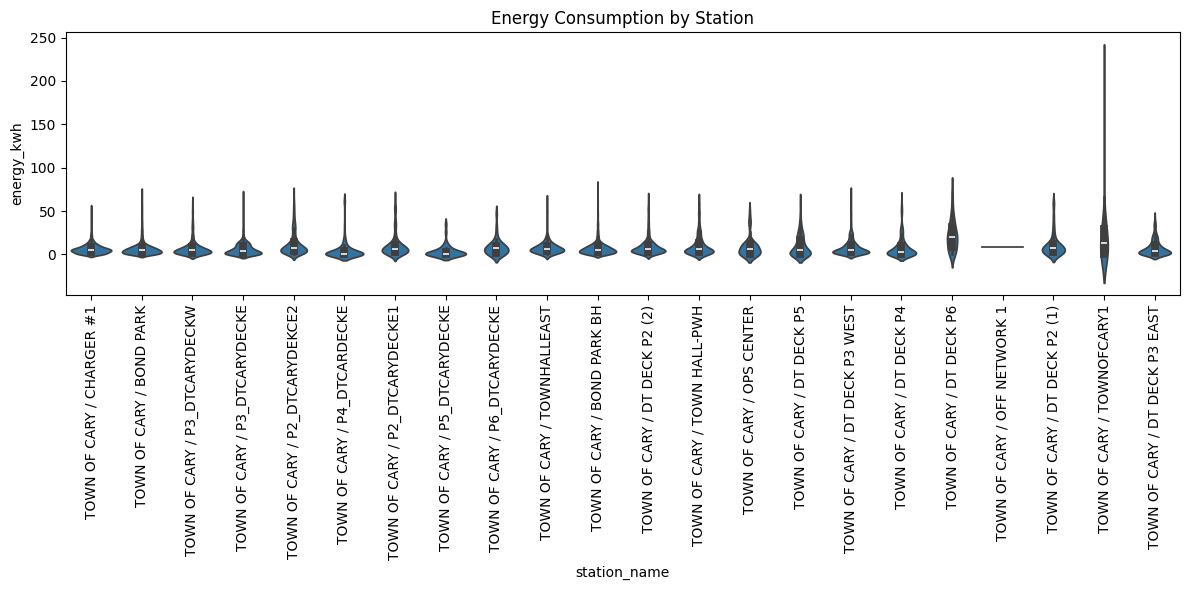

In [ ]:
# Violin plot for energy consumption across different stations
plt.figure(figsize=(12, 6))
sns.violinplot(x='station_name', y='energy_kwh', data=df)
plt.title('Energy Consumption by Station')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
rows_to_drop = df[df['station_name'].isin(['TOWN OF CARY / TOWNOFCARY1', 'TOWN OF CARY / OFF NETWORK 1'])].index

df.drop(rows_to_drop, inplace=True)
print(df)

                     start_date                   station_name  \
4421  2012-04-11 17:51:19+00:00      TOWN OF CARY / CHARGER #1   
14034 2012-04-11 18:02:16+00:00      TOWN OF CARY / CHARGER #1   
12096 2012-04-11 18:17:22+00:00      TOWN OF CARY / CHARGER #1   
14033 2012-05-02 19:38:09+00:00      TOWN OF CARY / CHARGER #1   
18110 2012-05-11 00:29:48+00:00      TOWN OF CARY / CHARGER #1   
...                         ...                            ...   
9777  2023-01-03 15:43:03+00:00  TOWN OF CARY / DT DECK P2 (2)   
18120 2023-01-03 15:53:37+00:00   TOWN OF CARY / TOWN HALL-PWH   
4430  2023-01-03 16:33:19+00:00  TOWN OF CARY / DT DECK P2 (2)   
15325 2023-01-03 17:29:44+00:00  TOWN OF CARY / DT DECK P2 (2)   
5940  2023-01-03 17:58:04+00:00   TOWN OF CARY / TOWN HALL-PWH   

      charging_time_hh_mm_ss  energy_kwh   latitude  longitude  tmin  tmax  \
4421                00:01:49       0.091  35.796886 -78.808044   7.8  19.4   
14034               00:00:00       0.000  35.796886

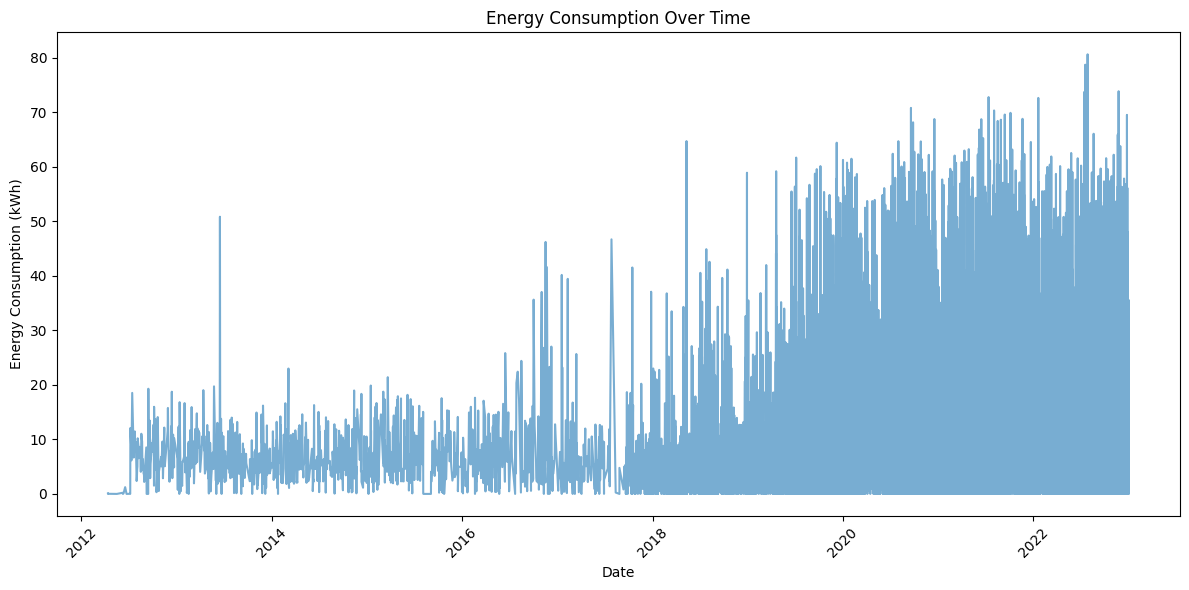

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['start_date'], df['energy_kwh'], label='Energy Consumption (kWh)', alpha=0.6)
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Feature Engineering

In [ ]:
#Extract relevant data from start date
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month
df['day'] = df['start_date'].dt.day
df['hour'] = df['start_date'].dt.hour
df['day_of_week'] = df['start_date'].dt.dayofweek

df = df.drop(columns=['start_date'])

In [ ]:
def time_to_seconds(time_str):
    hh, mm, ss = map(int, time_str.split(':'))
    return hh * 3600 + mm * 60 + ss

df['charging_time_seconds'] = df['charging_time_hh_mm_ss'].apply(time_to_seconds)
df = df.drop(columns=['charging_time_hh_mm_ss'])

In [ ]:
print(df)

                        station_name  energy_kwh   latitude  longitude  tmin  \
4421       TOWN OF CARY / CHARGER #1       0.091  35.796886 -78.808044   7.8   
14034      TOWN OF CARY / CHARGER #1       0.000  35.796886 -78.808044   7.8   
12096      TOWN OF CARY / CHARGER #1       0.023  35.796886 -78.808044   7.8   
14033      TOWN OF CARY / CHARGER #1       0.000  35.796886 -78.808044  19.4   
18110      TOWN OF CARY / CHARGER #1       0.000  35.796886 -78.808044   9.4   
...                              ...         ...        ...        ...   ...   
9777   TOWN OF CARY / DT DECK P2 (2)      10.152  35.785385 -78.779701  10.6   
18120   TOWN OF CARY / TOWN HALL-PWH      18.288  35.789215 -78.778816  10.6   
4430   TOWN OF CARY / DT DECK P2 (2)      14.722  35.785385 -78.779701  10.6   
15325  TOWN OF CARY / DT DECK P2 (2)       8.463  35.785385 -78.779701  10.6   
5940    TOWN OF CARY / TOWN HALL-PWH       3.976  35.789215 -78.778816  10.6   

       tmax    tavg  coco  user_latitud

Feature Scaling and Encoding

In [ ]:
label_enc = LabelEncoder()
df['station_name_encoded'] = label_enc.fit_transform(df['station_name'])
df = df.drop(columns=['station_name'])

In [ ]:
print(df)

       energy_kwh   latitude  longitude  tmin  tmax    tavg  coco  \
4421        0.091  35.796886 -78.808044   7.8  19.4  12.092   0.0   
14034       0.000  35.796886 -78.808044   7.8  19.4  12.092   0.0   
12096       0.023  35.796886 -78.808044   7.8  19.4  12.092   0.0   
14033       0.000  35.796886 -78.808044  19.4  32.2  25.532   0.0   
18110       0.000  35.796886 -78.808044   9.4  22.8  16.088   0.0   
...           ...        ...        ...   ...   ...     ...   ...   
9777       10.152  35.785385 -78.779701  10.6  22.2  15.476   5.0   
18120      18.288  35.789215 -78.778816  10.6  22.2  15.476   5.0   
4430       14.722  35.785385 -78.779701  10.6  22.2  15.476   5.0   
15325       8.463  35.785385 -78.779701  10.6  22.2  15.476   5.0   
5940        3.976  35.789215 -78.778816  10.6  22.2  15.476   5.0   

       user_latitude  user_longitude  length_m  duration_s  base_duration_s  \
4421       35.800503      -78.806845       394         154              154   
14034      35

In [ ]:
X = df.drop(columns=['energy_kwh'])
y = df['energy_kwh']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(16057, 18) (16057,)
(2008, 18) (2008,)
(2007, 18) (2007,)


In [ ]:
numerical_columns = ['latitude','longitude',
                     'user_latitude', 'user_longitude', 'tmin', 'tmax', 'tavg', 'coco', 'length_m', 'duration_s',
                     'base_duration_s', 'year', 'month', 'day', 'hour', 'day_of_week', 'station_name_encoded', 'charging_time_seconds']
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_columns])
X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [ ]:
def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 7
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

print(X_train_seq.shape, y_train_seq.shape)


(16050, 7, 18) (16050,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, LayerNormalization
from tensorflow.keras.metrics import RootMeanSquaredError

# Define the robust model
model = Sequential([
    # Input LSTM layer with increased units and Bidirectional wrapper
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2]))),
    LayerNormalization(),
    Dropout(0.3),

    # Second LSTM layer with Bidirectional wrapper and Layer Normalization
    Bidirectional(LSTM(64, return_sequences=True)),
    LayerNormalization(),
    Dropout(0.3),

    # Third LSTM layer, no return_sequences as it's the last LSTM layer
    Bidirectional(LSTM(32)),
    LayerNormalization(),
    Dropout(0.2),

    # Dense layers with increased units and Layer Normalization
    Dense(64, activation='relu'),
    LayerNormalization(),
    Dense(32, activation='relu'),
    LayerNormalization(),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', RootMeanSquaredError])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_5                │ ?                           │     0 (unbuilt) │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_6                │ ?                           │     0 (unbuilt) │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_7                │ ?                           │     0 (unbuilt) │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_8                │ ?                           │     0 (unbuilt) │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_9                │ ?                           │     0 (unbuilt) │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=50,
    batch_size=32
)


Epoch 1/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 92s 60ms/step - loss: 103.4574 - mae: 6.2521 - root_mean_squared_error: 10.1699 - val_loss: 89.1821 - val_mae: 6.3263 - val_root_mean_squared_error: 9.4436
Epoch 2/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - loss: 104.4196 - mae: 6.4986 - root_mean_squared_error: 10.2128 - val_loss: 89.0613 - val_mae: 6.2624 - val_root_mean_squared_error: 9.4372
Epoch 3/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - loss: 99.1054 - mae: 6.3700 - root_mean_squared_error: 9.9484 - val_loss: 89.1238 - val_mae: 6.2990 - val_root_mean_squared_error: 9.4405
Epoch 4/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 29s 59ms/step - loss: 101.5392 - mae: 6.4087 - root_mean_squared_error: 10.0756 - val_loss: 89.0223 - val_mae: 6.2305 - val_root_mean_squared_error: 9.4352
Epoch 5/50
502/502 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - loss: 99.7915 - mae: 6.4024 - root_mean_squared_error: 9.9880 - val_loss: 89.1540 - val_mae: 6.3134 - val_root_mean_squared_error: 9.4421
Epoch 6/50
502/502 ━━━━━

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_seq)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_seq, y_pred))
print(f"RMSE: {rmse}")

# Calculate R²
r2 = r2_score(y_test_seq, y_pred)
print(f"R² Score: {r2}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step
RMSE: 9.127152973429196
R² Score: -0.002584077380683114


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ... (Your existing code for data loading, preprocessing, and model training) ...

# Predictions
predictions = model.predict(X_test)

# Inverse Transform Predictions if Needed
y_test_original = scaler.inverse_transform(np.column_stack([y_test] + [np.zeros((y_test.shape[0], len(features) - 1))]))[:, 0]
predictions_original = scaler.inverse_transform(np.column_stack([predictions.flatten()] + [np.zeros((predictions.shape[0], len(features) - 1))]))[:, 0]

# Calculate Metrics
mse = mean_squared_error(y_test_original, predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)

# Print Metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error (MSE): 145.12290563590412
Root Mean Squared Error (RMSE): 12.046696876567623
Mean Absolute Error (MAE): 7.886681838020056
R-squared (R2): 0.005653592023105003


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/FYP/Colab Files/df_with_weather_traffic_data.csv')

# Inspect the dataset
print(df.head())
print(df.info())

   Unnamed: 0                 start_date                    station_name  \
0           0  2021-04-06T18:48:40+00:00        TOWN OF CARY / BOND PARK   
1           1  2021-04-06T16:44:39+00:00        TOWN OF CARY / BOND PARK   
2           2  2021-04-06T12:45:28+00:00  TOWN OF CARY / P2_DTCARYDEKCE2   
3           3  2021-04-05T21:58:48+00:00  TOWN OF CARY / P2_DTCARYDEKCE2   
4           4  2021-04-04T22:55:23+00:00     TOWN OF CARY / TOWNHALLEAST   

  charging_time_hh_mm_ss  energy_kwh            address_1  \
0               01:30:22      10.587  801 High House Road   
1               01:17:09       8.349  801 High House Road   
2               00:28:15       1.548        113 Walnut St   
3               01:08:22       6.558        113 Walnut St   
4               07:08:24      44.355  228 Ambassador Loop   

             address_2  city  state_province  zip_postal_code  ...  \
0  Bond Park Boathouse  Cary  North Carolina            27513  ...   
1  Bond Park Boathouse  Cary  North 

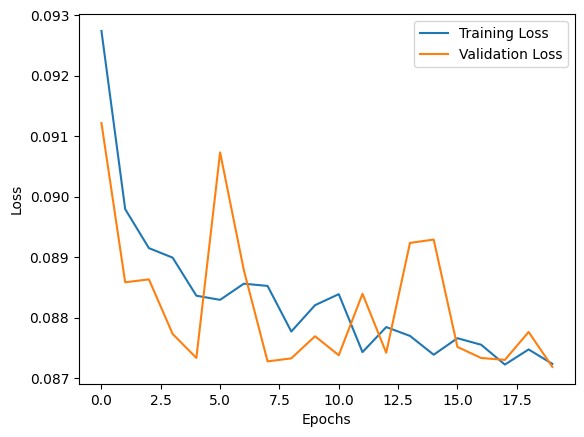

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.29527234013945014


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.23600960997879328


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MAE): 0.17643189138369075
Mean Squared Error (MSE): 0.08718575485142714


In [ ]:
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Root Mean Squared Error (RMSE): 0.29527234013945014
Mean Absolute Error (MAE): 0.17643189138369075
Mean Squared Error (MSE): 0.08718575485142714
R-squared (R²): 0.23600960997879328
